<a href="https://colab.research.google.com/github/Musu1/Deep-Learning/blob/master/Large_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Datasets,transforms and visualisation

In [0]:
transform_train=transforms.Compose([transforms.RandomResizedCrop(224),  # Change the size of image to 224x224
                                  transforms.ToTensor(),               # Converting it to tensor
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) # Normalizing the image ,first one is mean and second one is standard deviation

transform_test=transforms.Compose([transforms.RandomResizedCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [0]:
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform_train)
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform_test)

num_classes=10

batch_size=4

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [0]:
def imshow(img,title):
  npimg=img.numpy()*0.5+0.5 # Converting from tensor to numpy and then unnormalize it by multiplying to standard devistion and adding mean
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images,lables=next(iter(dataloader))
  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])

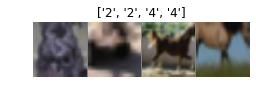

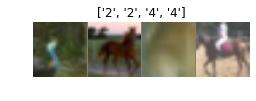

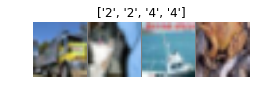

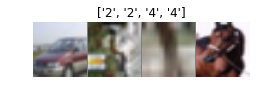

In [0]:
for i in range(4):
  show_batch_images(trainloader)

# Creating VGG-16

https://pytorch.org/docs/stable/_modules/torchvision/models/vgg.html


In [0]:
# We will be using already defined VGG models which can be seen in above link
# It is in models form torchvision so import it

from torchvision import models

In [0]:
vgg=models.vgg16_bn()
# So in the above definition their are different models with different layers of VGG net I am using vgg16_bn

In [0]:
# Now to see the layers and all the functionalities used in our model we can print and see
print(vgg)
# From output we can see first we have convolutional layers then avg pooling and finally fully connected network and then are under categories
#features,avg poool,classifiers respectively

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
print(vgg.features[0])
# First layer of the convolutional layer and similarly we can print layers as well

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [0]:
print(vgg.classifier[6])
# Lat layer of the fully connected layer

Linear(in_features=4096, out_features=1000, bias=True)


In [0]:
# Now we need to make change in above model because we just have 10 output classes and the model has 1000 output classes which can be see from above code's output
# So we can't just change the output feature to 10 because weights are already assigned according to 1000 layers so we need to change from core
final_in_features=vgg.classifier[6].in_features # We put all the features 
mod_classifier=list(vgg.classifier.children())[:-1] # Now removing the last layer
mod_classifier.extend([nn.Linear(final_in_features,num_classes)]) # Then again adding the last layer and linear fxn also defines the weight here only
print(mod_classifier) # out_features are 10 now

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [0]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# Train CIFAR10

In [0]:
# For training we are taking large batches
batch_size=16

trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
def evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    totals+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total
    

In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)

In [0]:
loss_epoch_arr = []
max_epochs=1

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2d'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
  
plt.plot(loss_epoch_arr)
plt.show

Iteration:0/3125 ,Loss=02
Iteration:100/3125 ,Loss=05


# Freeze layers of convolution operation